Recall that the perceptron step works as follows. For a point with coordinates (p,q)(p,q), label yy, and prediction given by the equation 

y^=step(w1x1 + w2x2 + b):

If the point is correctly classified, do nothing.
If the point is classified positive, but it has a negative label, subtract αp,αq, and α from w1,w2, and bb respectively.
If the point is classified negative, but it has a positive label, add αp,αq, and α to w1,w2, and bb respectively.
<figure>
 <img src="images/SDC_01_05_16_points.png" width="300" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"></p> 
 </figcaption>
</figure>

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

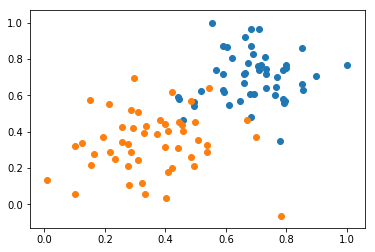

In [2]:
N_CLUSTERS = 2

array = np.loadtxt('data/SDC_01_05_16_data.csv', delimiter=',')

for i in range(N_CLUSTERS):
    labels = array[array[:,2] == i]
    plt.scatter(labels[:, 0], labels[:, 1])

plt.show()

In [3]:
# Setting the random seed, feel free to change it and see different solutions.
np.random.seed(42)

def stepFunction(t):
    if t >= 0:
        return 1
    return 0

def prediction(X, W, b):
    return stepFunction((np.matmul(X,W)+b)[0])

# TODO: Fill in the code below to implement the perceptron trick.
# The function should receive as inputs the data X, the labels y,
# the weights W (as an array), and the bias b,
# update the weights and bias W, b, according to the perceptron algorithm,
# and return W and b.
def perceptronStep(X, y, W, b, learn_rate = 0.01):
    for i in range(len(X)):
        y_hat = prediction(X[i],W,b)
        if y[i]-y_hat == 1:
            W[0] += X[i][0]*learn_rate
            W[1] += X[i][1]*learn_rate
            b += learn_rate
        elif y[i]-y_hat == -1:
            W[0] -= X[i][0]*learn_rate
            W[1] -= X[i][1]*learn_rate
            b -= learn_rate
    return W, b
    
# This function runs the perceptron algorithm repeatedly on the dataset,
# and returns a few of the boundary lines obtained in the iterations,
# for plotting purposes.
# Feel free to play with the learning rate and the num_epochs,
# and see your results plotted below.
def trainPerceptronAlgorithm(X, y, learn_rate = 0.01, num_epochs = 25):
    x_min, x_max = min(X.T[0]), max(X.T[0])
    y_min, y_max = min(X.T[1]), max(X.T[1])
    W = np.array(np.random.rand(2,1))
    b = np.random.rand(1)[0] + x_max
    # These are the solution lines that get plotted below.
    boundary_lines = []
    for i in range(num_epochs):
        # In each epoch, we apply the perceptron step.
        W, b = perceptronStep(X, y, W, b, learn_rate)
        boundary_lines.append((-W[0]/W[1], -b/W[1]))
    return boundary_lines, W, b


In [4]:
input1 = array[:,0]
input2 = array[:,1]
output = array[:,2]
Input = np.hstack((np.c_[input1], np.c_[input2]))

line_list, W, b = trainPerceptronAlgorithm(Input, output)
print('final_result:', W[0], W[1], b)

final_result: [-0.41144508] [-0.22328717] 0.3019939418114037


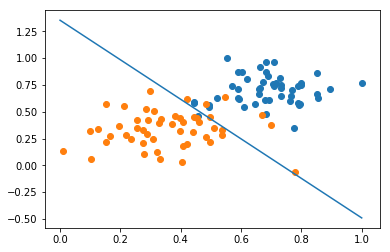

In [5]:
for i in range(N_CLUSTERS):
    labels = array[array[:,2] == i]
    plt.scatter(labels[:, 0], labels[:, 1])
    
# y^=step(w1x1 + w2x2 + b):
x = np.linspace(0, 1)
y = -(x * W[0] + b) / W[1]
plt.plot(x, y)

plt.show()